<a href="https://colab.research.google.com/github/ricardo-kowalski/notebooks/blob/master/LISTA3_MLP_KERAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Multilayer Perceptron  com Keras#
##LISTA DE EXERCÍCIOS 3##

Utilize o dataset abaixo:
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)
1. Implemente uma MLP no framework Keras para o dataset seguindo o tutorial abaixo e apresente a
curva de custo de 5 treinamentos. Não se esqueça de dividir o dataset em conjunto de treinamento e
validação (70% e 30%, respectivamente).
https://machinelearningmastery.com/build-multi-layer-perceptron-neural-network-models-keras/
2. Varie o parâmetro de batchsize (pelo menos 5) e apresente a acurácia, tempo de processamento e
uso de memória para cada configuração.
3. Varie o parâmetro de taxa de aprendizado (pelo menos 5) e apresente a acurácia, tempo de
processamento e uso de memória para cada configuração.



---

###Parte 1 - Features engineering###

Importando as bibliotecas

In [3]:
# Visualize training history
from keras.models import Sequential, Model
from keras.layers import Dense, Input, Activation
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Using TensorFlow backend.


Escolhendo uma semente para futuras replicações do modelo

In [0]:
seed = 7
np.random.seed(seed)

Carregando o dataset

In [0]:
'''
dataset = np.genfromtxt('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', delimiter=',',dtype=int)
'''

dataset = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', sep = ',')
 

Nomeando as colunas

In [0]:
dataset.columns = ['id','clump_thickness','unif_cell_size','unif_cell_shape','marg_adhesion','single_epith_size','bare_nuclei','bland_chrom','norm_nucleoli','mitoses','class']

Removendo a coluna categórica 'id'

In [0]:
dataset.drop(['id'], inplace=True, axis=1)

Substituindo os valores '?' 

In [0]:
dataset.replace('?', 5, inplace=True)   # valor escolhido: 5, talvez a média ou mediana fosse melhor opção)

Atribuindo os valores '0' e '1' às classes

In [0]:
dataset['class'] = dataset['class'].map(lambda x: 1 if x == 4 else 0)

Exibição do dataset

In [10]:
dataset.shape

(698, 10)

In [11]:
dataset.head()

,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
0,5,4,4,5,7,10,3,2,1,0
1,3,1,1,1,2,2,3,1,1,0
2,6,8,8,1,3,4,3,7,1,0
3,4,1,1,3,2,1,3,1,1,0
4,8,10,10,8,7,10,9,7,1,1




---

###Parte 2 - Análise dos dados###

Verificando a distribuição das features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2c9b3e40f0>,
      dtype=object)

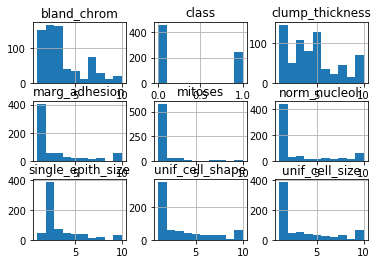

In [12]:
dataset.hist()

In [13]:
dataset.describe() 

,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_size,bland_chrom,norm_nucleoli,mitoses,class
count,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000
mean,4.416905,3.137536,3.210602,2.809456,3.217765,3.438395,2.869628,1.590258,0.345272
std,2.817673,3.052575,2.972867,2.856606,2.215408,2.440056,3.055004,1.716162,0.475798
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,0.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


Matriz de correlação

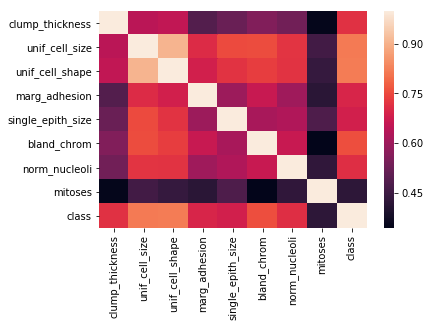

In [14]:
import seaborn as sns

corr = dataset.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()



---

###Parte 3 - Preparando o dataset ###

Separando as features das classes

In [0]:
X = dataset.iloc[:, 0:9]
Y = dataset.iloc[:,-1]



---

Normalizando os dados de treinamento

Método escolhido Min-Max Scaler:

>$ \frac{x_i - min(x)} {max(x) - min(x)} $


In [16]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()    # método escolhido MinMaxScaler (o RobustScaler se mostrou menos eficaz)
'''
scaler = preprocessing.RobustScaler()
'''

'\nscaler = preprocessing.RobustScaler()\n'

In [0]:
X = scaler.fit_transform(X)

Dividindo os datasets anteriores em 70% para treinamento e 30% para validação

In [0]:
from sklearn.model_selection import train_test_split

test_size = 0.3

X_train, X_test, y_train, y_test =  train_test_split(X, Y, test_size = test_size, random_state = seed)




---

###Parte 4 - Criando o modelo###

In [19]:
model = Sequential()

model.add(Dense(9, input_dim=9, kernel_initializer='random_uniform', activation='relu'))
model.add(Dense(9, kernel_initializer='random_uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='random_uniform', activation='sigmoid'))

'''
# Multi-layer neural networks
inputs = Input(shape=(9,))
hidden1 = Dense(9, activation='relu')(inputs)
hidden2 = Dense(9, activation='relu')(hidden1)
output = Dense(1, activation='sigmoid')(hidden2)
model = Model(inputs=inputs, outputs=output)

'''

Instructions for updating:
Colocations handled automatically by placer.


"\n# Multi-layer neural networks\ninputs = Input(shape=(9,))\nhidden1 = Dense(9, activation='relu')(inputs)\nhidden2 = Dense(9, activation='relu')(hidden1)\noutput = Dense(1, activation='sigmoid')(hidden2)\nmodel = Model(inputs=inputs, outputs=output)\n\n"

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 9)                 90        
_________________________________________________________________
dense_2 (Dense)              (None, 9)                 90        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 10        
Total params: 190
Trainable params: 190
Non-trainable params: 0
_________________________________________________________________
None


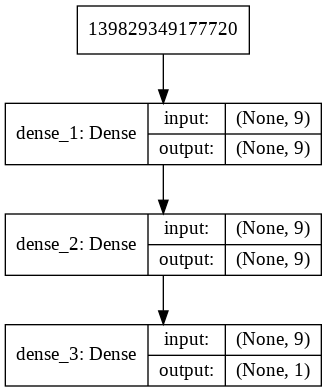

In [20]:
'''visualizando o modelo'''
from keras.utils import plot_model

# Model summary
print(model.summary())

# Salva o modelo
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')

#Plota o modelo
from IPython.display import Image

Image(filename='model.png')


ANN Visualizer (desenha a arquitetura da rede neural utilizando grafos)

In [21]:
!pip3 install ann_visualizer

  Stored in directory: /root/.cache/pip/wheels/b6/b4/4e/d92f50c9c4f004cf315a0e0fcd455486bd799c50fe80cf1f5d
Successfully built ann-visualizer


In [0]:
#Gerando e salvando a visualização do grafo

from ann_visualizer.visualize import ann_viz

ann_viz(model, title="Grafo 1",filename = "rede1", view=True)   #não plota automaticamente no notebook

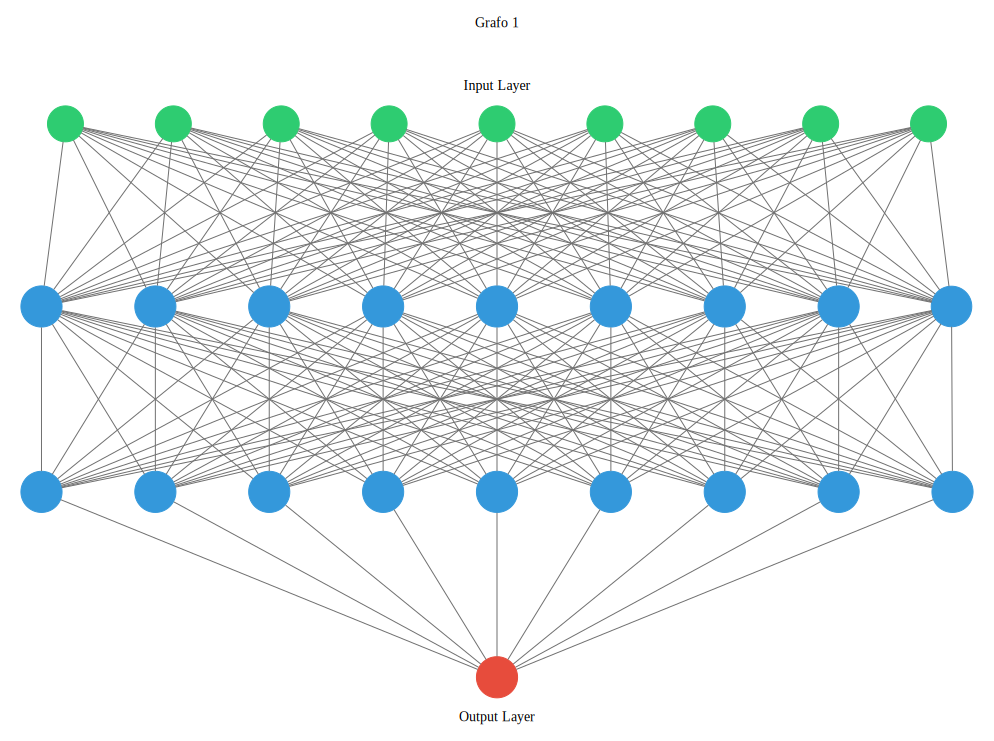

In [23]:
#Plota o modelo

import graphviz

with open("rede1") as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)




---

###Parte 5 - Treinamento do modelo###

Compilando o modelo (definindo: função de erro, otimizador, métricas)

In [0]:
from keras import optimizers

# Compile model  #################<<<<<<<<<<<<<<<<<<<<TESTANDO OUTRO OTIMIZADOR

'''
sgd = optimizers.SGD(lr=0.001)
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])
'''
learning_rate = 0.001

opt = optimizers.Adam(lr=learning_rate)

model.compile(loss='binary_crossentropy', optimizer= opt, metrics=['accuracy'])

Treinando o modelo

In [25]:
# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=5, verbose=0)

Instructions for updating:
Use tf.cast instead.


Plotando a performance

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


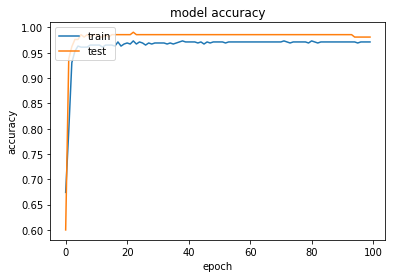

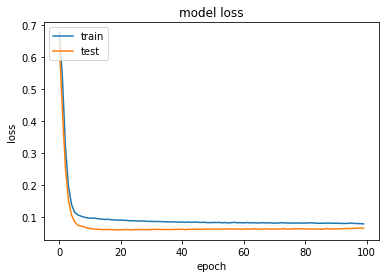

In [26]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



---

###Parte 6 - Variando o tamanho do batch###

In [0]:
#biblioteca para medir consumo de memória
import resource

from keras.callbacks import Callback

class MemoryCallback(Callback):
    def on_train_end(self, logs=None):
        print("Memory usage: ",resource.getrusage(resource.RUSAGE_SELF).ru_maxrss, "bytes")

In [0]:
#treinando o modelo segundo o número de batches
def fit_model(trainX, trainy, testX, testy, n_batch):
    # definindo
    model = Sequential()
    model.add(Dense(9, input_dim=9, kernel_initializer='random_uniform', activation='relu'))
    model.add(Dense(9, kernel_initializer='random_uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='random_uniform', activation='sigmoid'))
    # compilando
    model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
    # treinando o modelo
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                        epochs=100, batch_size=batch_sizes[i], 
                        verbose=0, callbacks=[MemoryCallback()])   #, callbacks=[MemoryCallback()])
    # plotando as curvas
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='test')
    plt.title('batch='+str(n_batch), pad=-60)
    
    '''
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='lower right')
    '''


---- Treinamento 0 ----
Memory usage:  321412 bytes
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs

---- Treinamento 1 ----
Memory usage:  329060 bytes
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs

---- Treinamento 2 ----
Memory usage:  339476 bytes
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.39 µs

---- Treinamento 3 ----
Memory usage:  350304 bytes
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs

---- Treinamento 4 ----
Memory usage:  358368 bytes
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs

---- Treinamento 5 ----
Memory usage:  370260 bytes
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs

---- Treinamento 6 ----
Memory usage:  381180 bytes
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs

---- Treinamento 7 ----
Memory usage:  389748 bytes
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs


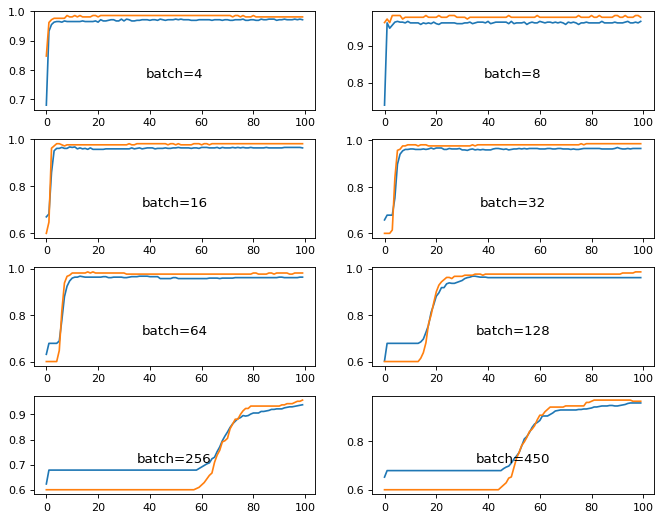

In [29]:
#biblioteca para plotagem dos gráficos
from matplotlib.pyplot import figure
#tamanho da imagem a ser impressa
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

# plotando as curvas de acordo com os batches
batch_sizes = [4, 8, 16, 32, 64, 128, 256, 450]
for i in range(len(batch_sizes)):
    print("\n---- Treinamento", i, "----")
	# determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    plt.subplots_adjust(hspace=0.3)
    # treinando o modelo variando os batch sizes
    fit_model(X_train, y_train, X_test, y_test, batch_sizes[i])
    %time
    
# plotando as curvas
plt.show()

###Parte 7 - Variando a taxa de aprendizado###

In [0]:
# fit a model and plot learning curve
def fit_model(trainX, trainy, testX, testy, n_lrn_rate):
    # defininindo o modelo
    model = Sequential()
    model.add(Dense(9, input_dim=9, kernel_initializer='random_uniform', activation='relu'))
    model.add(Dense(9, kernel_initializer='random_uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='random_uniform', activation='sigmoid'))
    # compilando o modelo
    opt = optimizers.Adam(lr=n_lrn_rate)
    model.compile(loss='binary_crossentropy', optimizer= opt, metrics=['accuracy'])
    # treinando
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                        epochs=100, batch_size=5, verbose=0 , callbacks=[MemoryCallback()])
    # plotando as curvas
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='test')
    plt.title('learning rate ='+str(n_lrn_rate), pad=-60)



---- Treinamento 0 ----
Memory usage:  404636 bytes
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.39 µs

---- Treinamento 1 ----
Memory usage:  415588 bytes
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs

---- Treinamento 2 ----
Memory usage:  426252 bytes
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs

---- Treinamento 3 ----
Memory usage:  429800 bytes
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.63 µs

---- Treinamento 4 ----
Memory usage:  440108 bytes
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.91 µs

---- Treinamento 5 ----
Memory usage:  450260 bytes
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs


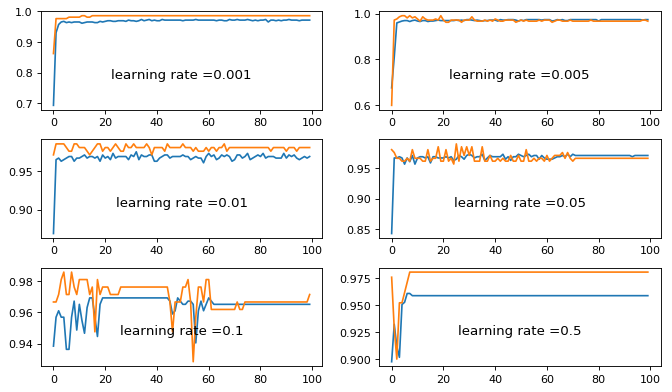

In [31]:
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')  #(8,6)

# cria curvas de acordo com as taxas de aprendizado 'lrn_rates'
lrn_rates = [0.001, 0.005, 0.010, 0.05, 0.1, 0.5]
for i in range(len(lrn_rates)):
    print("\n---- Treinamento", i, "----")
	# determina o número de gráficos
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    plt.subplots_adjust(hspace=0.3)
    # treina o modelo variando lrn_rates
    fit_model(X_train, y_train, X_test, y_test, lrn_rates[i])
    %time
    
# mostra os gráficos
plt.show()



---

###Parte 8 - Resultados###

In [32]:
scores_test = model.evaluate(X_test, y_test)
scores_test

210/210 [==============================] - 0s 74us/step


[0.0664955436473801, 0.9809523809523809]

Acurácia

In [33]:
print("%s: %.2f%%" % (model.metrics_names[1], scores_test[1]*100))

acc: 98.10%


In [0]:
y_pred = model.predict(X_test)

In [35]:
rounded = [np.round(x[0]) for x in y_pred]
print(rounded)

[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,

Matriz de confusão

In [36]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred.round())
print(conf_mat)

[[123   3]
 [  1  83]]


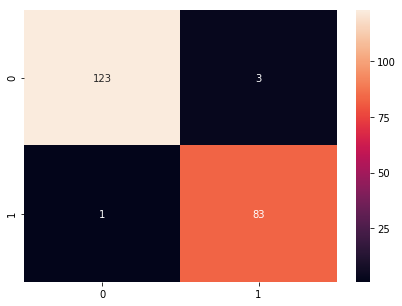

In [37]:
df_cm = pd.DataFrame(conf_mat, index = ("0", "1"), columns = ("0", "1"))
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')



---



###Referências###

https://machinelearningmastery.com/how-to-make-classification-and-regression-predictions-for-deep-learning-models-in-keras/

https://github.com/keras-team/keras/blob/master/examples/reuters_mlp.py

https://machinelearningmastery.com/how-to-control-the-speed-and-stability-of-training-neural-networks-with-gradient-descent-batch-size/

https://machinelearningmastery.com/how-to-control-the-speed-and-stability-of-training-neural-networks-with-gradient-descent-batch-size/

https://gist.github.com/HareeshBahuleyan/a35750e80348a163e04838ec0039dcca

https://www.kdnuggets.com/2019/03/advanced-keras-accurately-resuming-training-process.html